In [3]:
# Basic libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# ML models
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the CSV file
file_path = r"C:\Users\PC\Downloads\Base.csv\Base.csv"
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [5]:
# Shape of the dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (1000000, 32)


In [6]:
# Column names and data types
print("\nColumn info:")
print(df.info())


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h            

In [7]:
# Summary statistics for numerical columns
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
           fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%  

In [8]:
# Total missing values per column
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source            

In [9]:
# Count of fraud and non-fraud
print("\nFraud vs Non-Fraud count:")
print(df['fraud_bool'].value_counts())


Fraud vs Non-Fraud count:
fraud_bool
0    988971
1     11029
Name: count, dtype: int64


In [10]:
# Percentage
fraud_percentage = df['fraud_bool'].value_counts(normalize=True) * 100
print("\nFraud percentage:")
print(fraud_percentage)


Fraud percentage:
fraud_bool
0    98.8971
1     1.1029
Name: proportion, dtype: float64


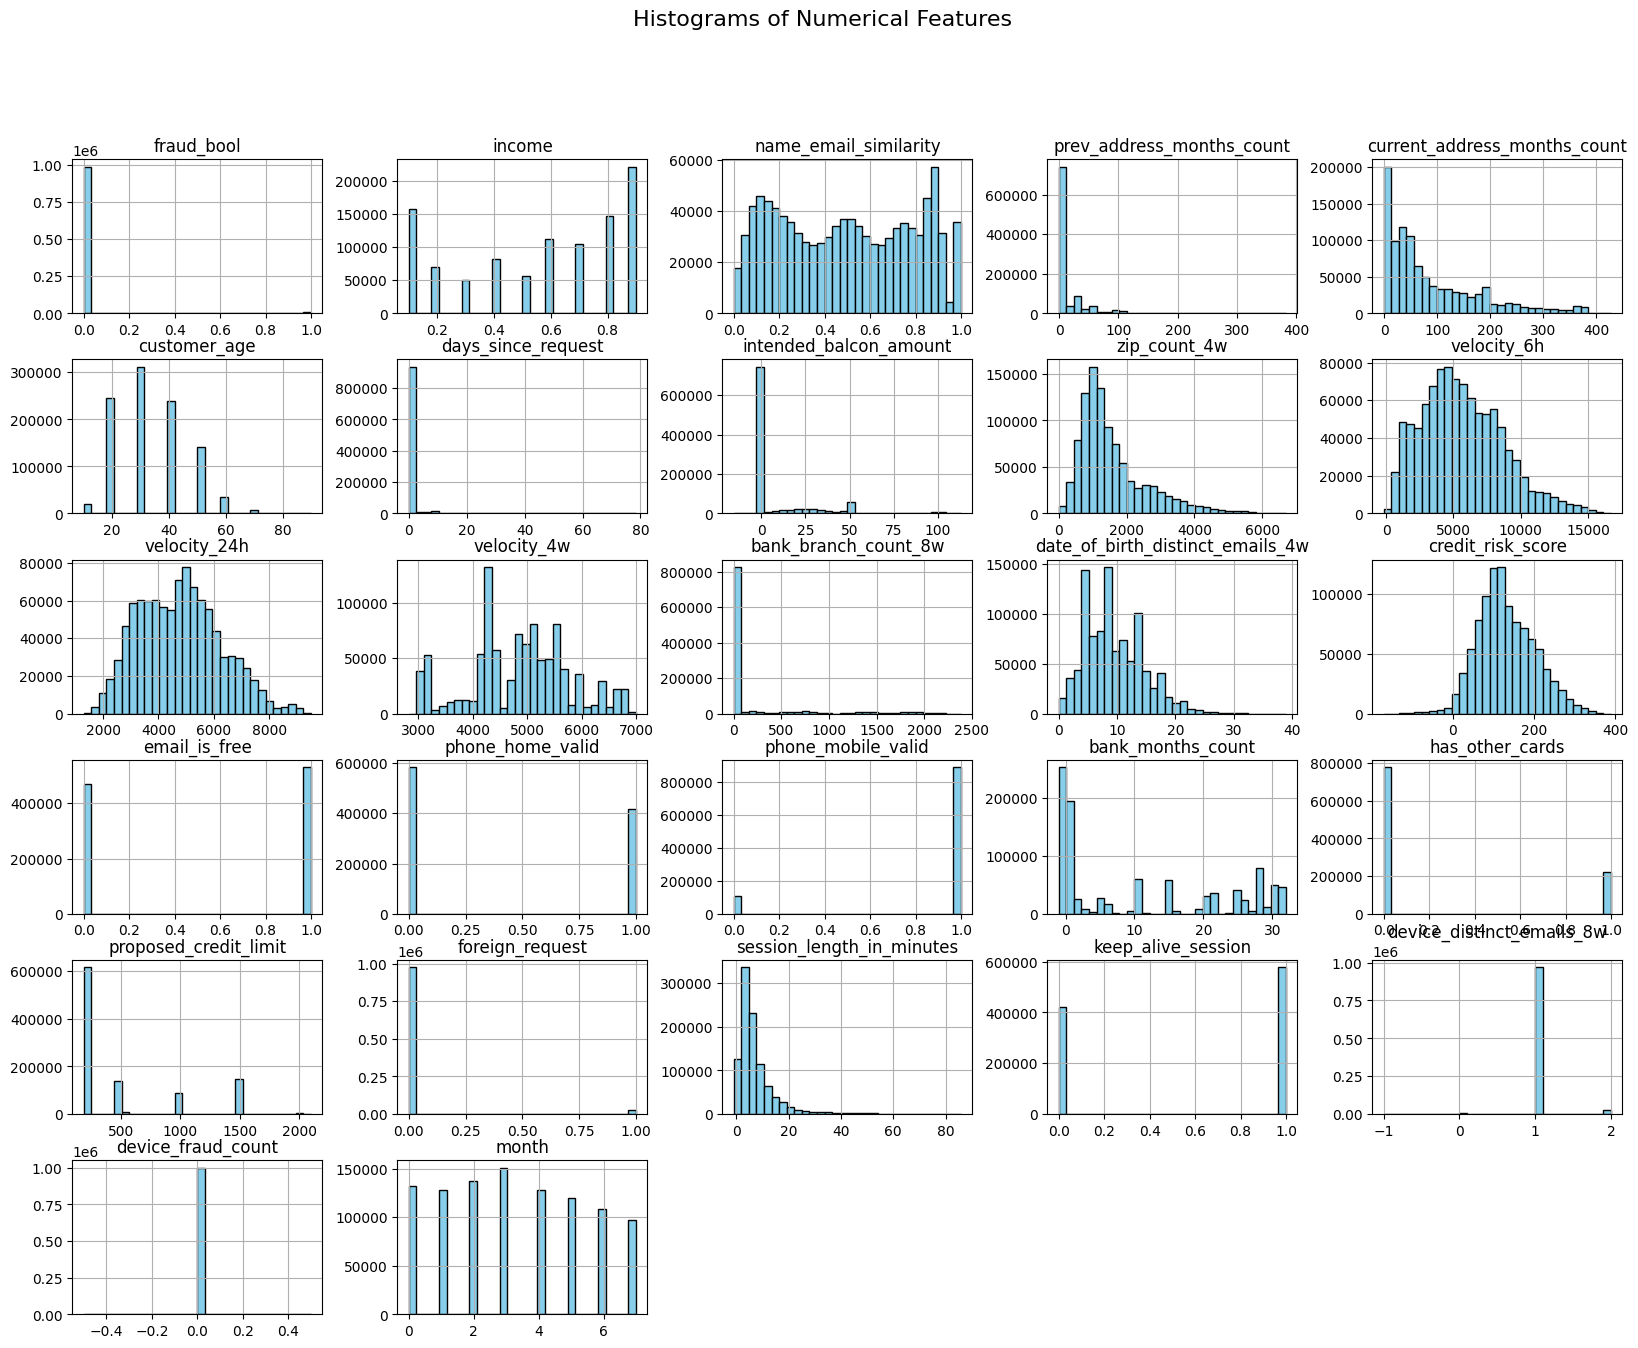

In [11]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms for numerical features
df[num_cols].hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


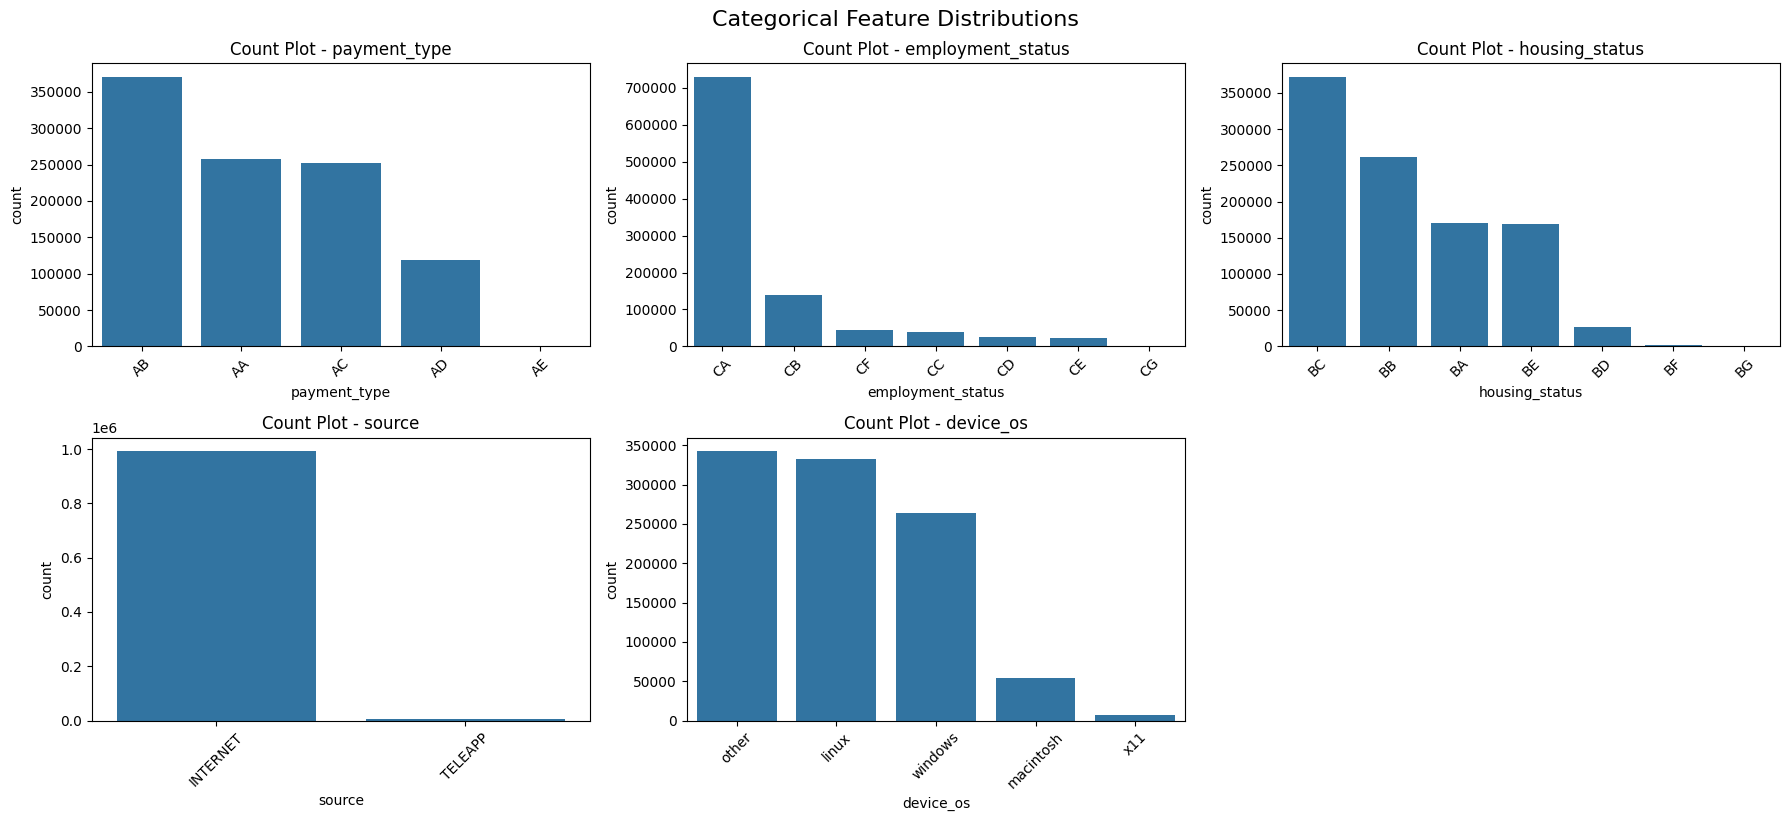

In [12]:
# Get categorical columns
import math
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Define grid size (rows and columns)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(cat_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count Plot - {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()



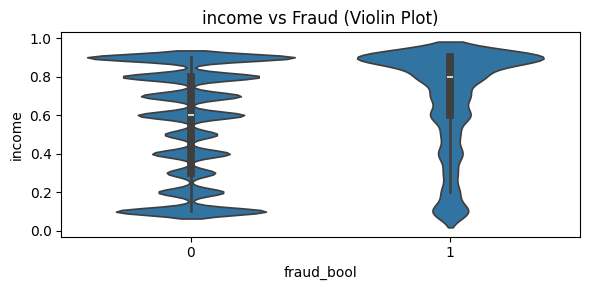

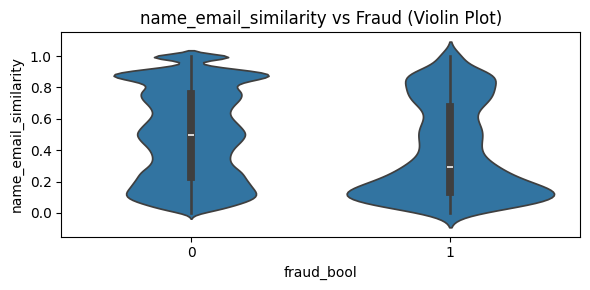

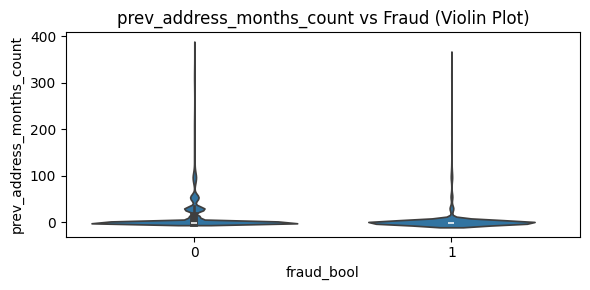

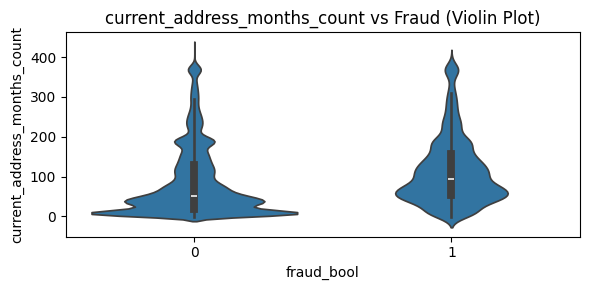

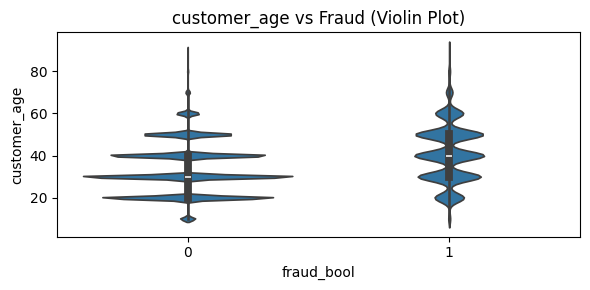

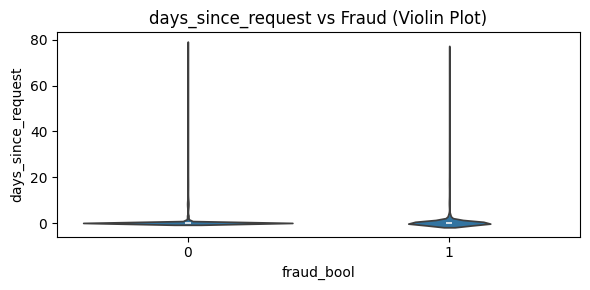

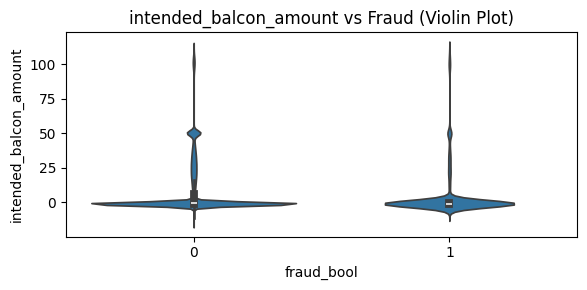

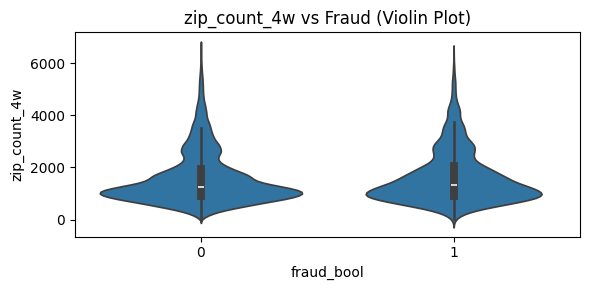

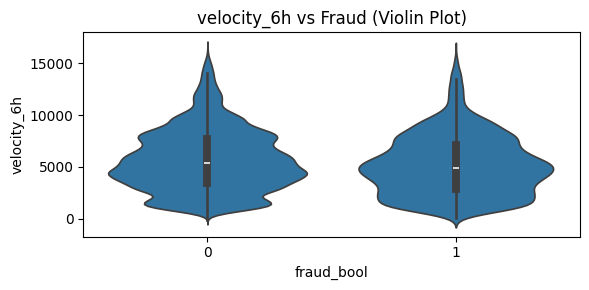

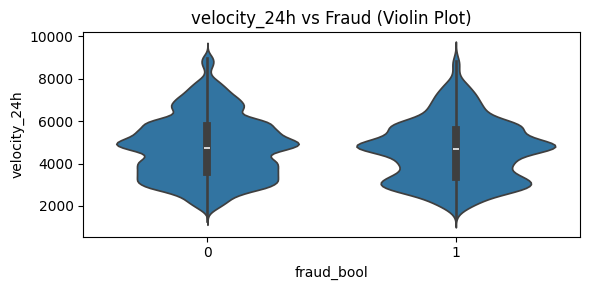

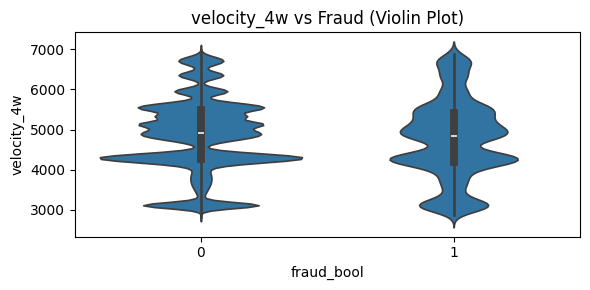

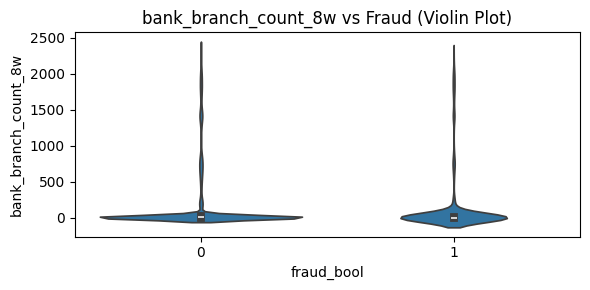

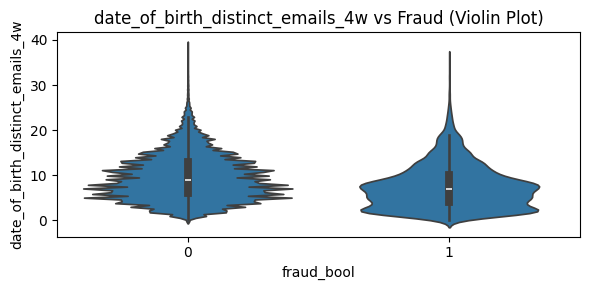

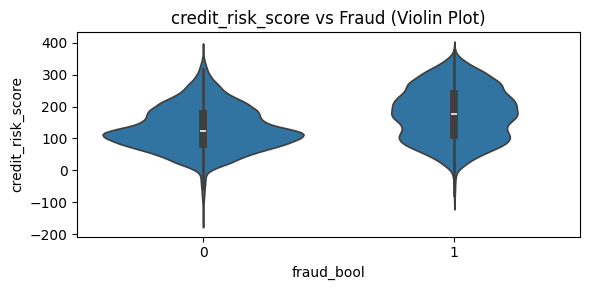

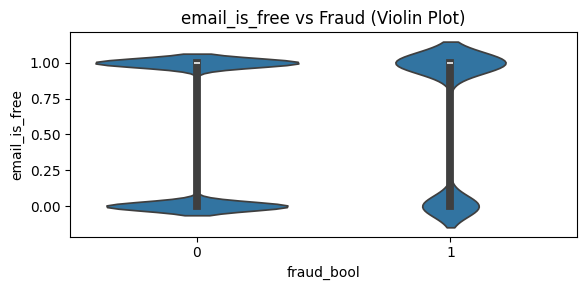

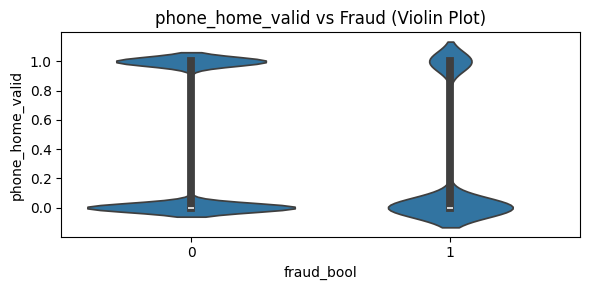

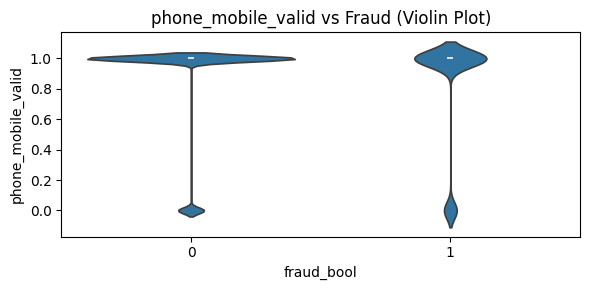

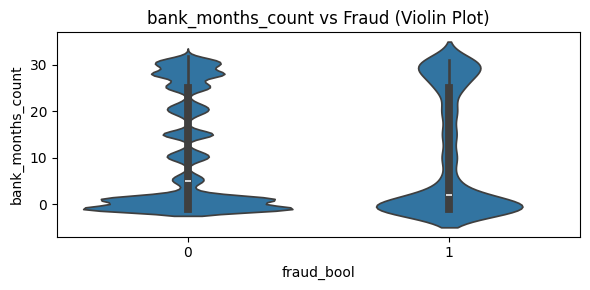

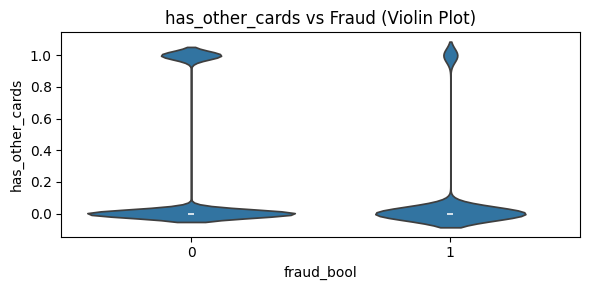

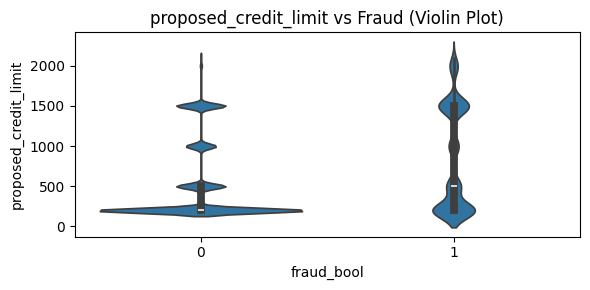

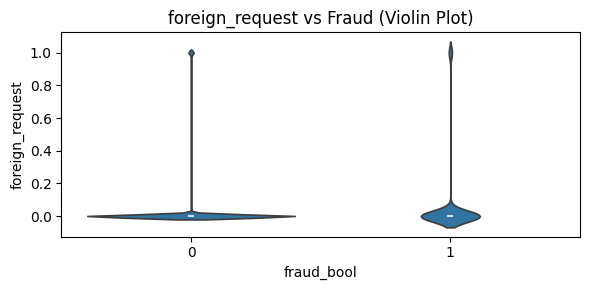

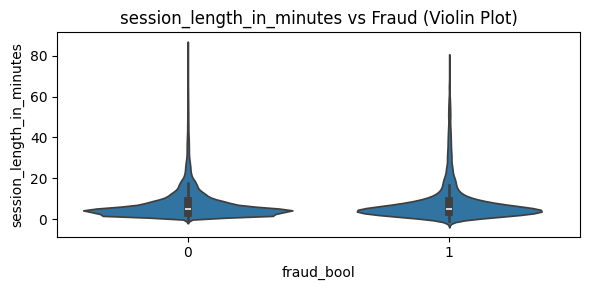

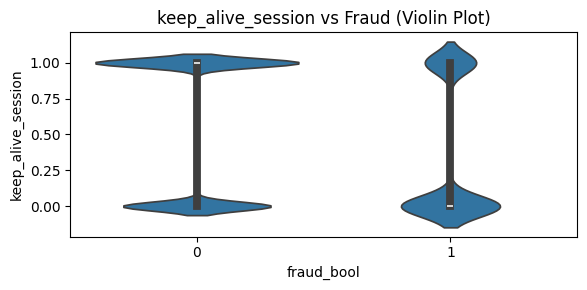

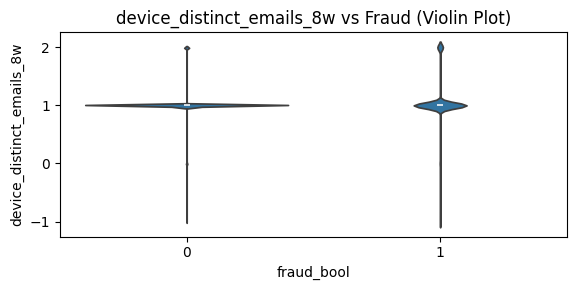

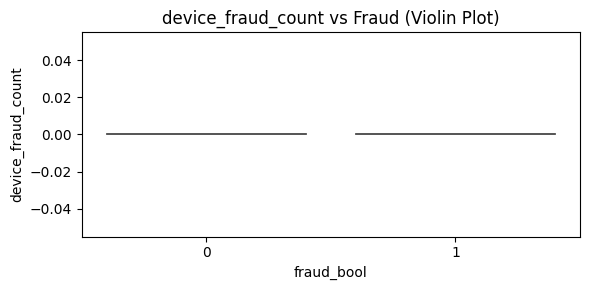

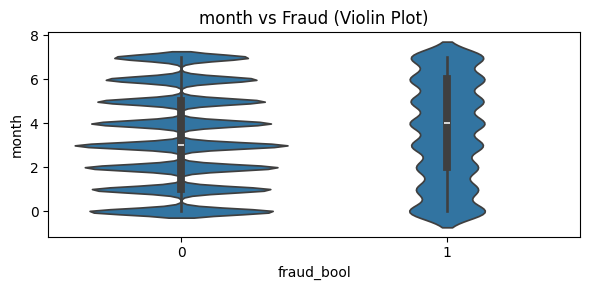

In [13]:
for col in num_cols:
    if col != 'fraud_bool':
        plt.figure(figsize=(6,3))
        sns.violinplot(x='fraud_bool', y=col, data=df)
        plt.title(f"{col} vs Fraud (Violin Plot)")
        plt.tight_layout()
        plt.show()


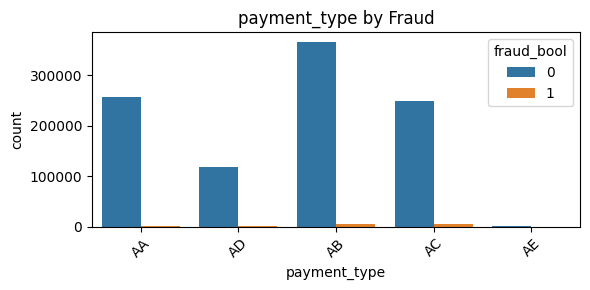

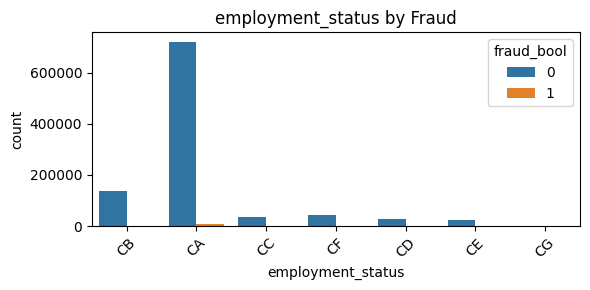

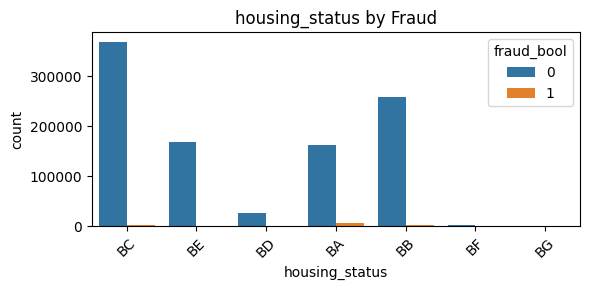

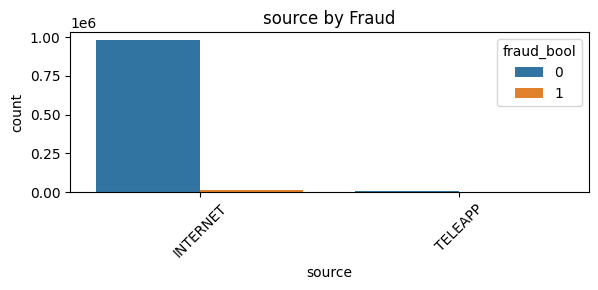

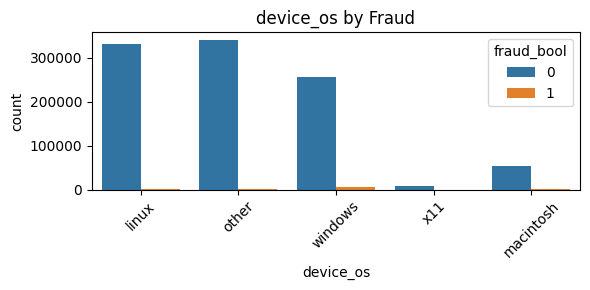

In [14]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='fraud_bool', data=df)
    plt.title(f"{col} by Fraud")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


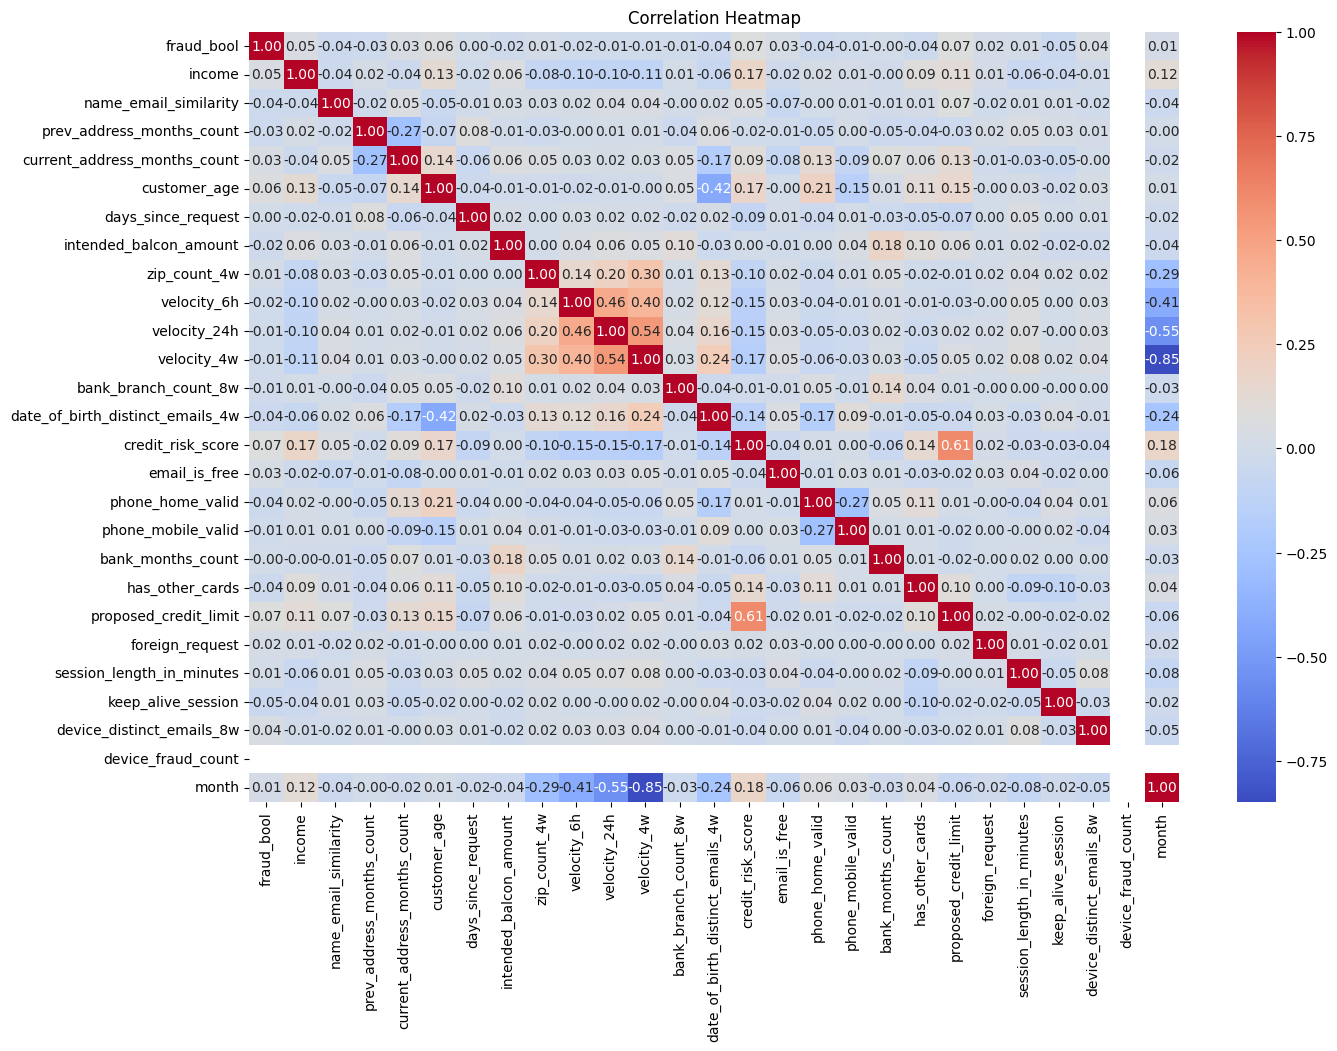

In [15]:
plt.figure(figsize=(15,10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# 1. Separate features and target
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']


In [17]:
#Train-Test Split FIRST!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
class PreprocessingCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.drop_cols = [
            'session_length_in_minutes',
            'velocity_24h',
            'zip_count_4w',
            'device_fraud_count'
        ]
        self.missing_cols = [
            'prev_address_months_count',
            'current_address_months_count',
            'bank_months_count',
            'device_distinct_emails_8w'
        ]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Drop unwanted columns
        X = X.drop(columns=self.drop_cols, errors='ignore')
        # Replace -1 with NaN
        X[self.missing_cols] = X[self.missing_cols].replace(-1, np.nan)
        return X


In [19]:
cleaned_sample = PreprocessingCleaner().fit_transform(X_train)

numeric_cols = cleaned_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = cleaned_sample.select_dtypes(include='object').columns.tolist()


In [20]:
from sklearn.preprocessing import OneHotEncoder
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])



In [21]:
base_pipeline = Pipeline([
    ('cleaner', PreprocessingCleaner()),
    ('preprocessor', preprocessor)
])

X_train_clean = base_pipeline.fit_transform(X_train)
test_clean = base_pipeline.transform(X_test)


In [22]:
X_train_clean = X_train_clean.toarray() if hasattr(X_train_clean, "toarray") else X_train_clean
X_test_clean = test_clean.toarray() if hasattr(test_clean, "toarray") else test_clean

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        class_weight='balanced',
        C=0.1,
        penalty='l2',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ))
])

# Train
lr_pipeline.fit(X_train_clean, y_train)

# Probabilities
lr_train_prob = lr_pipeline.predict_proba(X_train_clean)[:, 1]
lr_test_prob = lr_pipeline.predict_proba(X_test_clean)[:, 1]

# AUC Scores
lr_auc_train = roc_auc_score(y_train, lr_train_prob)
lr_auc_test = roc_auc_score(y_test, lr_test_prob)

print("=== Logistic Regression ===")
print("ROC AUC (Train):", lr_auc_train)
print("ROC AUC (Test) :", lr_auc_test)
print("Overfitting (AUC Diff):", abs(lr_auc_train - lr_auc_test))
print("No significant overfitting" if abs(lr_auc_train - lr_auc_test) < 0.05 else "Possible overfitting")


=== Logistic Regression ===
ROC AUC (Train): 0.8726617618664589
ROC AUC (Test) : 0.8737273738584087
Overfitting (AUC Diff): 0.0010656119919497664
No significant overfitting


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,  # Reduced depth
    min_samples_split=20,  # Larger splits
    min_samples_leaf=10,   # Larger leaves
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_clean, y_train)

rf_train_prob = rf.predict_proba(X_train_clean)[:, 1]
rf_test_prob = rf.predict_proba(X_test_clean)[:, 1]

rf_auc_train = roc_auc_score(y_train, rf_train_prob)
rf_auc_test = roc_auc_score(y_test, rf_test_prob)

print("\n=== Random Forest (Improved) ===")
print("ROC AUC (Train):", rf_auc_train)
print("ROC AUC (Test) :", rf_auc_test)
print("Overfitting (AUC Diff):", abs(rf_auc_train - rf_auc_test))
print("No significant overfitting" if abs(rf_auc_train - rf_auc_test) < 0.03 else "Possible overfitting")



=== Random Forest (Improved) ===
ROC AUC (Train): 0.873737530176275
ROC AUC (Test) : 0.8681767568538458
Overfitting (AUC Diff): 0.005560773322429213
No significant overfitting


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Class weight to handle imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# New XGBoost model with regularization and reduced complexity
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    scale_pos_weight=scale_pos_weight,
    reg_alpha=0.5,
    reg_lambda=1.0,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# Fit model
xgb_model.fit(X_train_clean, y_train)

# Predict probabilities
xgb_train_prob = xgb_model.predict_proba(X_train_clean)[:, 1]
xgb_test_prob = xgb_model.predict_proba(X_test_clean)[:, 1]

# AUC scores
train_auc = roc_auc_score(y_train, xgb_train_prob)
test_auc = roc_auc_score(y_test, xgb_test_prob)

print(f"XGBoost Train AUC: {train_auc:.4f}")
print(f"XGBoost Test AUC : {test_auc:.4f}")

if train_auc - test_auc > 0.1:
    print("Still Overfitting Detected. Try tuning further.")
else:
    print(" Overfitting Reduced. Model is generalizing better.")


XGBoost Train AUC: 0.8965
XGBoost Test AUC : 0.8918
 Overfitting Reduced. Model is generalizing better.
